# Lecture 37: Function Transformer

Importing Libraries

In [11]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

Importing Dataframe

In [12]:
house=fetch_california_housing(as_frame=True)
df=house.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
print(df.shape)

(20640, 9)


## Train Test Split

In [14]:
X=df.drop(columns=['MedHouseVal','Longitude'])
y=df.MedHouseVal

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Making Hist Plots

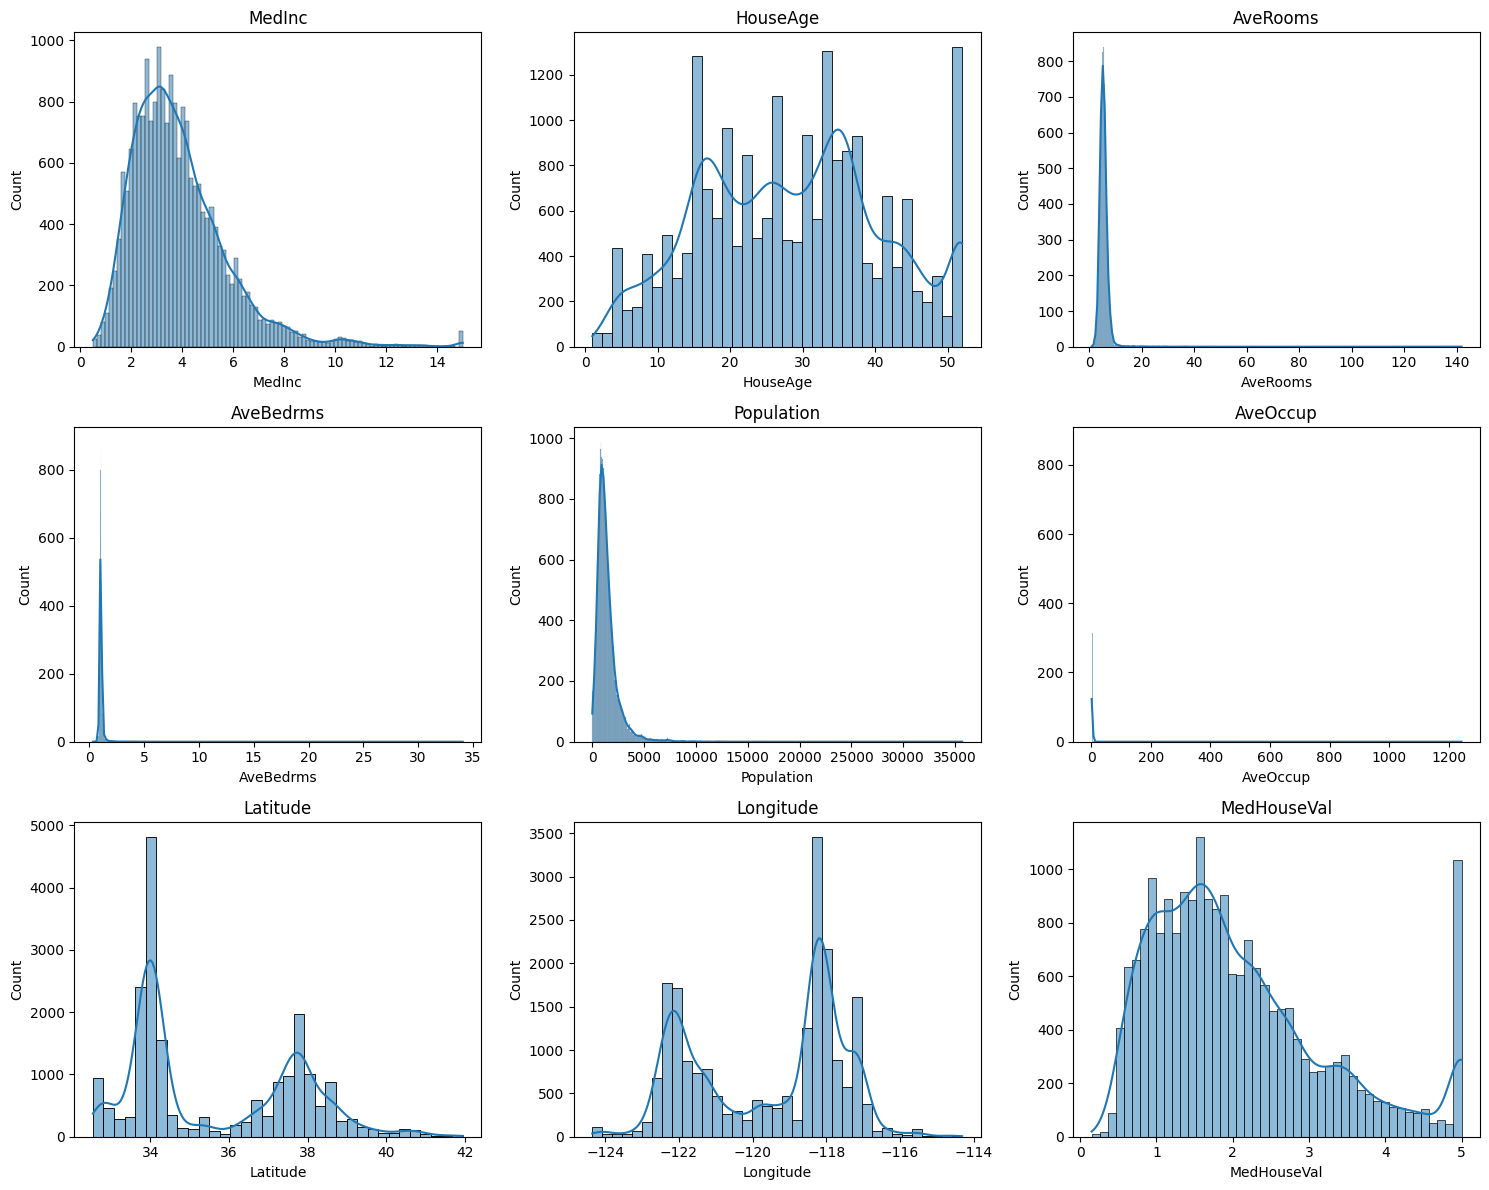

In [15]:
num_cols = df.select_dtypes(include='number').columns
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row  # auto rows

plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col],kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


Making QQ Plot

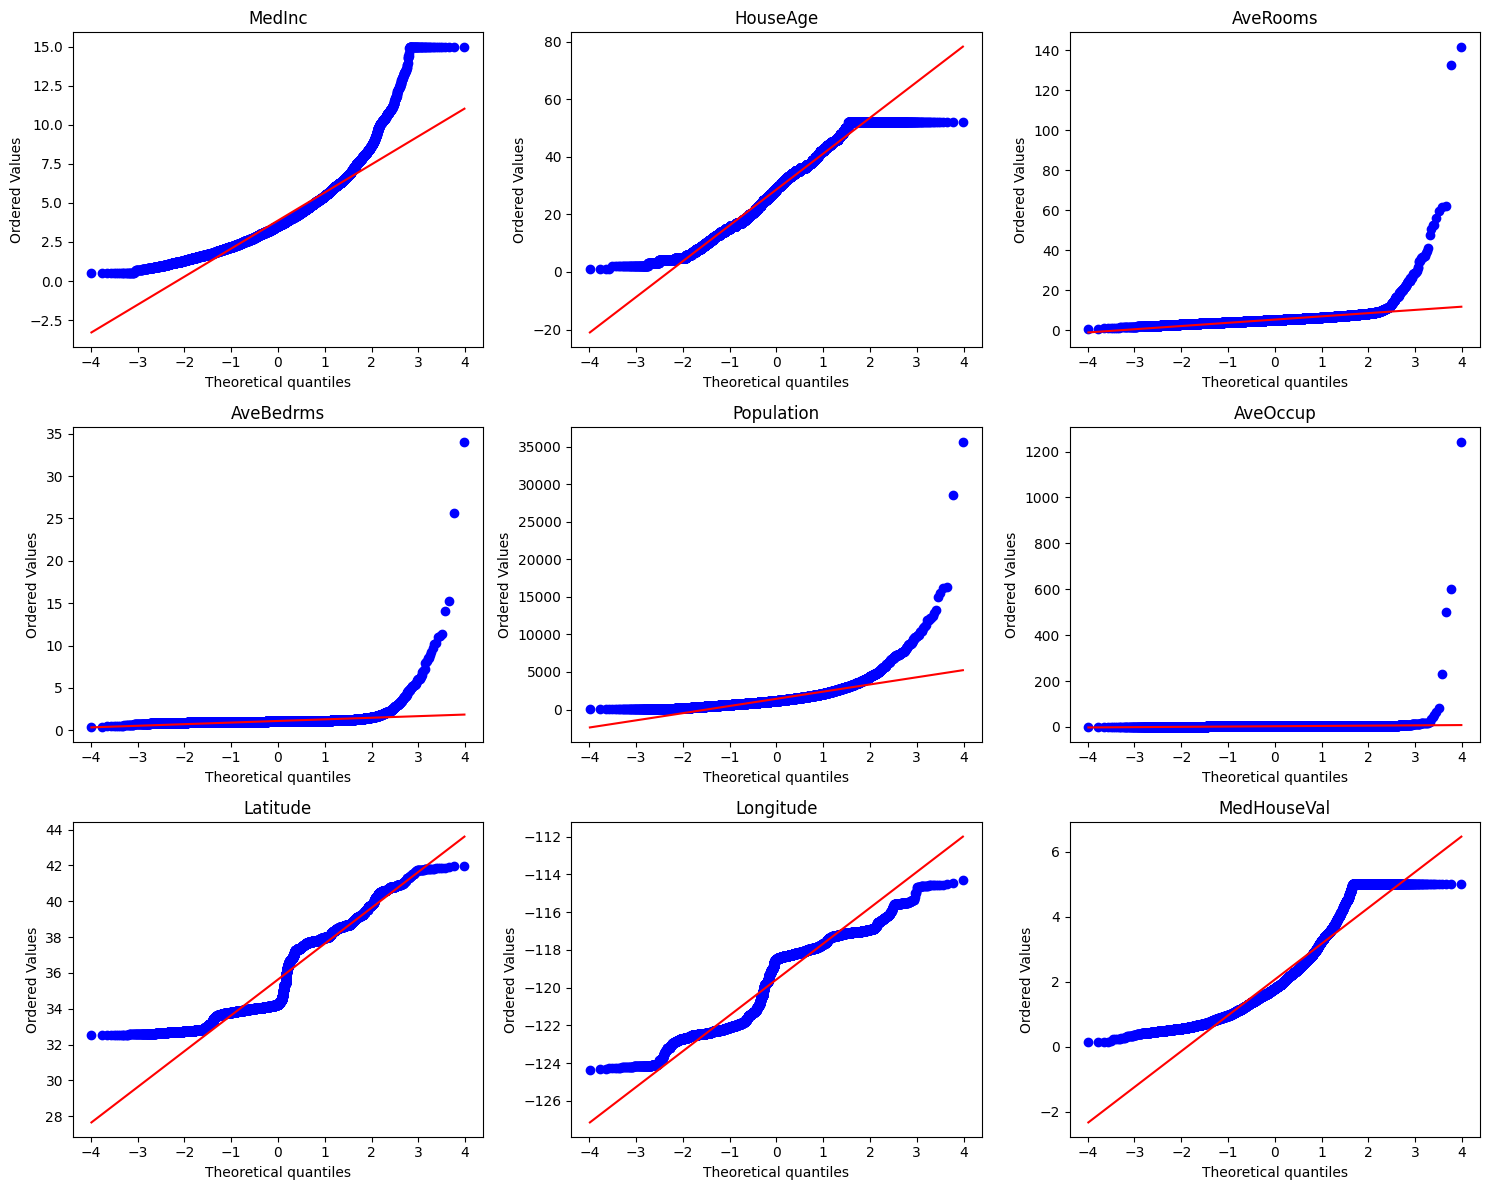

In [16]:
num_cols = df.select_dtypes(include='number').columns
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row 

plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    stats.probplot(df[col], plot=plt)
    plt.title(col)

plt.tight_layout()
plt.show()


Checking R2 score Before Function Transformer

In [50]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print("R2 Score:", r2_score(y_test, lr_pred))


R2 Score: 0.5442220863068972


Applying Function Transformer

In [51]:
# log=FunctionTransformer(func=np.log1p) # Log transformer

sqrt=FunctionTransformer(func=np.sqrt) # Sqrt Transformer

# reciprocal=FunctionTransformer(func=np.reciprocal) # Reciprocal Transformer



In [52]:
# X_train_transformed=log.fit_transform(X_train)
# X_test_transformed=log.transform(X_test)

X_train_transformed=sqrt.fit_transform(X_train)
X_test_transformed=sqrt.transform(X_test)


# X_train_transformed=reciprocal.fit_transform(X_train)
# X_test_transformed=reciprocal.transform(X_test)

Checking R2 score after Function Transformer

In [53]:
lr_trf=LinearRegression()

lr_trf.fit(X_train_transformed,y_train)

lr_pred=lr_trf.predict(X_test_transformed)

print("R2 Score:", r2_score(y_test, lr_pred))


R2 Score: 0.5562314364019587
